In [29]:
#a)Importing all necessary libraries
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import random

In [31]:
#b) load the training and testing data

mnist=tf.keras.datasets.mnist
(x_train,y_train), (x_test,y_test) = mnist.load_data()

x_train=x_train / 255
x_test=x_test / 255




In [18]:
#c)Define the network architecture using keras

model=keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
     keras.layers.Dense(128,activation="relu"),
     keras.layers.Dense(10,activation="softmax")
])

model.summary()



Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 784)               0         
                                                                 
 dense_6 (Dense)             (None, 128)               100480    
                                                                 
 dense_7 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [32]:
#D) train the model using SGD
model.compile(optimizer="sgd",
              loss="sparse_categorical_crossentropy",metrics=['accuracy'] )

history=model.fit(x_train, y_train, validation_data = (x_test,y_test),epochs=3)



Epoch 1/3
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6360 - accuracy: 0.8393 - val_loss: 0.3581 - val_accuracy: 0.9038
Epoch 2/3
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3348 - accuracy: 0.9068 - val_loss: 0.2938 - val_accuracy: 0.9189
Epoch 3/3
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2874 - accuracy: 0.9190 - val_loss: 0.2603 - val_accuracy: 0.9260


313/313 [==============================] - 1s 3ms/step - loss: 0.2603 - accuracy: 0.9260
loss=  0
Accuracy=  1


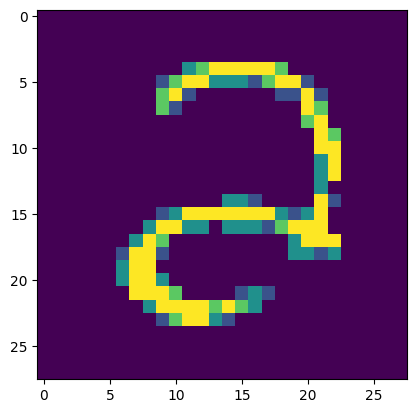

313/313 [==============================] - 1s 2ms/step


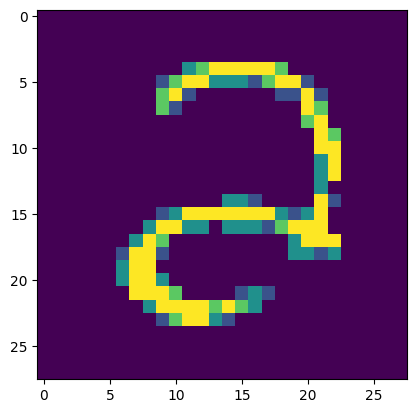

Predicted value: [4.6759505e-02 4.2438207e-04 8.2217085e-01 4.9281191e-02 1.8674147e-04
 1.0165132e-02 9.3574747e-03 3.8887782e-05 6.1602436e-02 1.3498253e-05]


In [33]:
#e)Evaluate the network

test_loss,test_acc=model.evaluate(x_test,y_test)
print("loss=%3.f" %test_loss)
print("Accuracy=%3.f" %test_acc)

n=random.randint(0,9999)
plt.imshow(x_test[n])
plt.show()
predicted_value=model.predict(x_test)
plt.imshow(x_test[n])
plt.show()

print('Predicted value:',predicted_value[n])


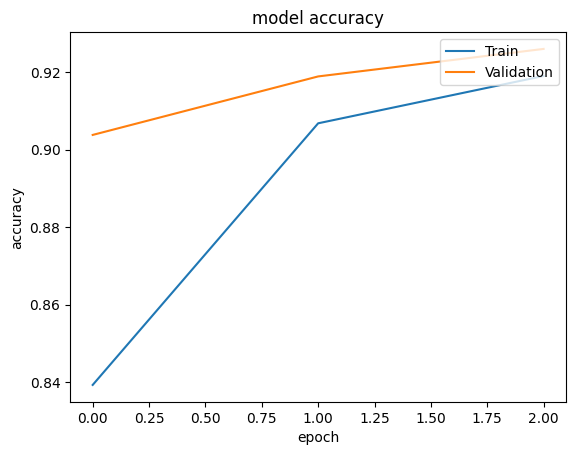

In [34]:
#f plot the training loss and accuracy


#TRAINING ACCUARACY
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'],loc="upper right")
plt.show()


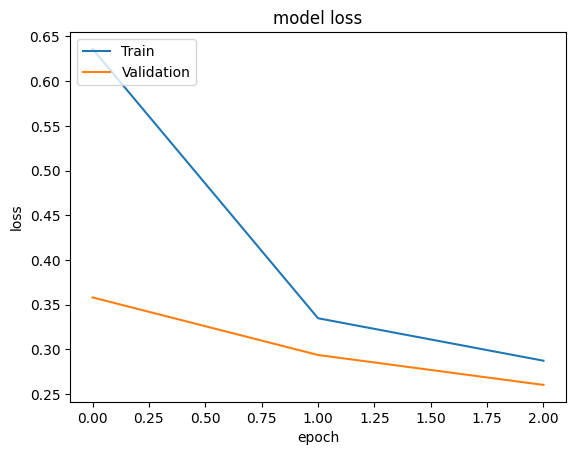

In [35]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'],loc="upper left")
plt.show()